In [3]:
import pandas as pd
import re
from collections import Counter

print("--> Attempting to load 'train.csv' and 'medical_keywords_summary.csv'...")

try:
    # Step 1: Load both CSV files.
    df_text = pd.read_csv('train.csv')
    df_keywords = pd.read_csv('medical_keywords_summary.csv')
    
    print("--> Files loaded successfully.")

    # Step 2: Create the vocabulary from your keywords file.
    # This is done inside the 'try' block to ensure it only happens if files load.
    MEDICAL_VOCABULARY = set(df_keywords['medical_term'].str.lower().unique())
    print(f"--> Using {len(MEDICAL_VOCABULARY)} unique medical terms from your summary file as a filter.")

    # --- Define the function to find and count specific medical terms ---
    def find_specific_medical_terms(text, vocabulary):
        if not isinstance(text, str):
            return Counter()
        
        # Cleans and tokenizes text to find words matching the vocabulary
        words = re.findall(r'\b\w+\b', text.lower())
        found_terms = [word for word in words if word in vocabulary]
        return Counter(found_terms)

    # Step 3: Process the dataframe to find and extract terms.
    print("\n--> Processing text to find your specific medical terms...")
    results = []

    for index, row in df_text.iterrows():
        text = row['text']
        label_num = row['labels']
        
        term_counts = find_specific_medical_terms(text, MEDICAL_VOCABULARY)
        
        label_text = "1 (Side Effect)" if label_num == 1 else "0 (No Effect)"
        
        for term, count in term_counts.items():
            results.append({
                'medical_term': term,
                'count': count,
                'label': label_text
            })

    # Step 4: Aggregate and save the results.
    if results:
        final_df = pd.DataFrame(results)
        summary_output_df = final_df.groupby(['medical_term', 'label'])['count'].sum().reset_index()

        output_filename = 'extracted_medical_terms_final.csv'
        summary_output_df.to_csv(output_filename, index=False)

        print(f"\n✅ Extraction complete! Results saved to '{output_filename}'")
        print("\n--> Preview of the extracted data:")
        print(summary_output_df.head())
    else:
        print("\n--> No matching medical terms from your list were found in the training data.")

except FileNotFoundError as e:
    # This block will now execute gracefully instead of crashing the kernel.
    print("\n--- KERNEL CRASH AVOIDED ---")
    print(f"Error: A required file was not found.")
    print(f"Missing File: '{e.filename}'")
    print("Please make sure both 'train.csv' and 'medical_keywords_summary.csv' are in the same directory as your Jupyter Notebook and try again.")

--> Attempting to load 'train.csv' and 'medical_keywords_summary.csv'...
--> Files loaded successfully.
--> Using 25 unique medical terms from your summary file as a filter.

--> Processing text to find your specific medical terms...

✅ Extraction complete! Results saved to 'extracted_medical_terms_final.csv'

--> Preview of the extracted data:
    medical_term            label  count
0          aches    0 (No Effect)      7
1          aches  1 (Side Effect)    150
2  amitriptyline    0 (No Effect)     47
3       blisters    0 (No Effect)     72
4       blisters  1 (Side Effect)     35


✅ All libraries are installed. Running the main script...

--- Cleaning Data ---
--- Engineering Features ---
--- Generating Visualizations ---


/var/folders/wn/fqg2h_797bx2xw4xnwjf6y_r0000gn/T/ipykernel_26742/1386325996.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_terms.values, y=top_20_terms.index, palette='viridis')


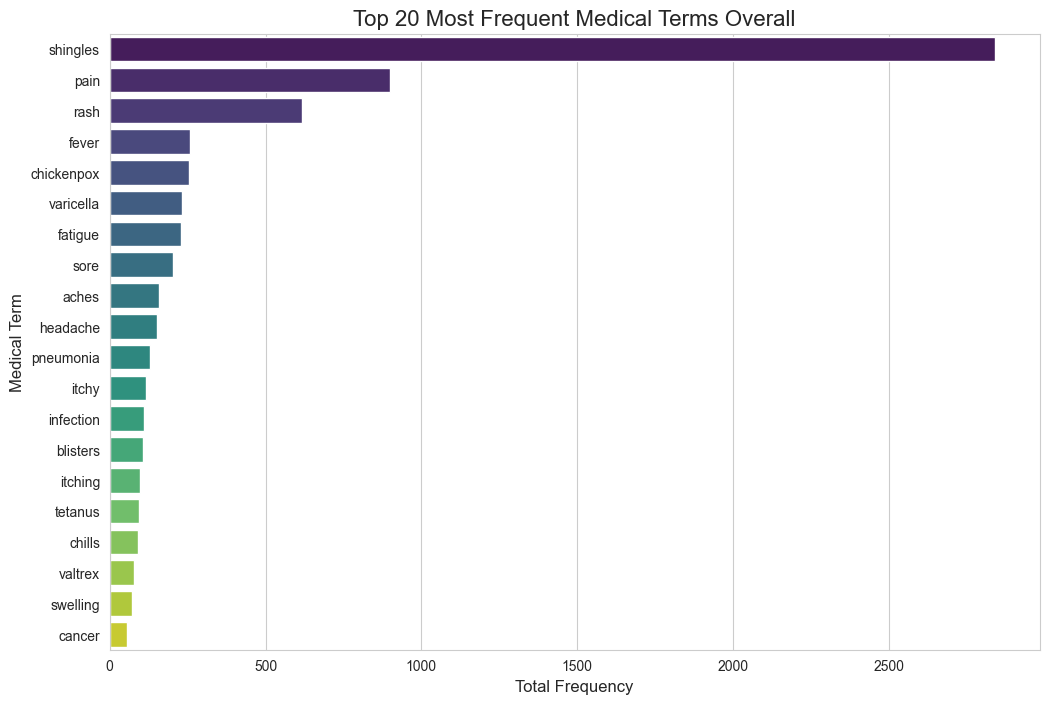


✅ Script finished successfully. Enhanced data saved to 'cleaned_and_featured_data.csv'


In [2]:
# --- FINAL ANALYSIS SCRIPT ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ All libraries are installed. Running the main script...\n")

# Set plot style for better visuals
sns.set_style("whitegrid")

try:
    df = pd.read_csv('extracted_medical_terms_final.csv')

    # 1. DATA CLEANING
    print("--- Cleaning Data ---")
    df.dropna(inplace=True)
    df['medical_term'] = df['medical_term'].str.lower().str.strip()
    df.drop_duplicates(inplace=True)

    # 2. FEATURE ENGINEERING
    print("--- Engineering Features ---")
    df['is_side_effect'] = df['label'].apply(lambda x: 1 if '1' in str(x) else 0)
    df['term_length'] = df['medical_term'].str.len()
    term_frequency = df.groupby('medical_term')['count'].sum()
    df['term_total_frequency'] = df['medical_term'].map(term_frequency)

    # 3. VISUALIZATION
    print("--- Generating Visualizations ---")
    plt.figure(figsize=(12, 8))
    top_20_terms = df.groupby('medical_term')['term_total_frequency'].max().nlargest(20)
    sns.barplot(x=top_20_terms.values, y=top_20_terms.index, palette='viridis')
    plt.title('Top 20 Most Frequent Medical Terms Overall', fontsize=16)
    plt.xlabel('Total Frequency', fontsize=12)
    plt.ylabel('Medical Term', fontsize=12)
    plt.show()

    # 4. SAVE THE ENHANCED DATASET
    output_filename = 'cleaned_and_featured_data.csv'
    df.to_csv(output_filename, index=False)
    print(f"\n✅ Script finished successfully. Enhanced data saved to '{output_filename}'")

except FileNotFoundError:
    print("❌ ERROR: 'extracted_medical_terms_final.csv' not found.")
    print("Please make sure the file is in the same directory as your notebook.")

✅ All libraries are installed. Running the model training script...

--> Successfully loaded 'cleaned_and_featured_data.csv'. Shape: (43, 6)

--- Preparing Data for Machine Learning ---
--> Data split into training (34 rows) and testing (9 rows) sets.


{'='*20} MODEL 1: RANDOM FOREST {'='*20}
--> Training the Random Forest model...

--- Random Forest Evaluation ---
🎯 Accuracy: 0.4444 (44.44%)

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.40      0.50      0.44         4

    accuracy                           0.44         9
   macro avg       0.45      0.45      0.44         9
weighted avg       0.46      0.44      0.44         9



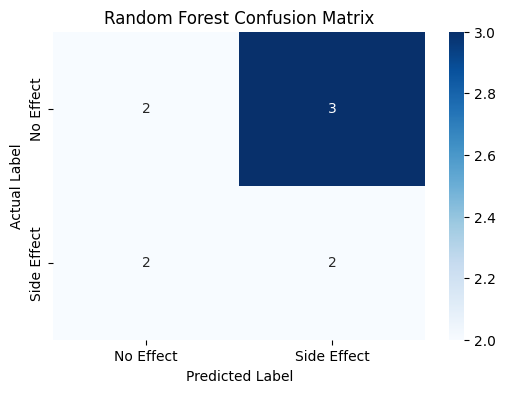



==================== MODEL 2: SUPPORT VECTOR MACHINE (SVM) ====================
--> Training the SVM model...

--- Support Vector Machine (SVM) Evaluation ---
🎯 Accuracy: 0.1111 (11.11%)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.17      0.25      0.20         4

    accuracy                           0.11         9
   macro avg       0.08      0.12      0.10         9
weighted avg       0.07      0.11      0.09         9



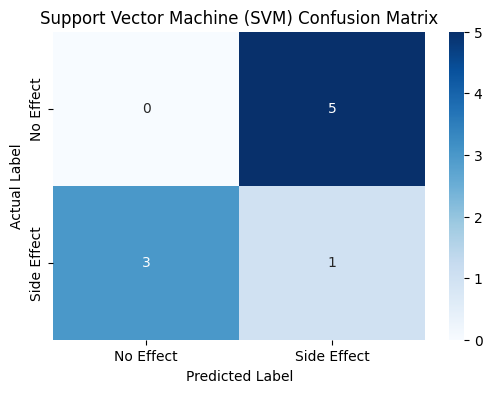

In [ ]:
# --- UNIVERSAL INSTALL & MACHINE LEARNING SCRIPT ---
#
# INSTRUCTIONS:
# 1. Run this cell. If scikit-learn is missing, it will be installed, and the kernel will stop.
# 2. After the kernel restarts, RE-RUN THIS SAME CELL to train the models.
#
import sys
import os
import subprocess

# Add scikit-learn for machine learning
REQUIRED_PACKAGES = ['pandas', 'matplotlib', 'seaborn', 'scikit-learn']

def install_and_restart(packages):
    """Installs required packages and forces a kernel restart."""
    print("One or more required packages are missing.")
    python_executable = sys.executable
    for package in packages:
        try:
            __import__(package.split('-')[-1]) # Handles 'scikit-learn' -> 'sklearn'
        except ImportError:
            print(f"--> Installing {package}...")
            subprocess.check_call([python_executable, "-m", "pip", "install", package],
                                  stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
    
    print("\n*** KERNEL RESTART REQUIRED ***")
    print("Installation complete. Please RE-RUN THIS CELL after the kernel restarts.")
    os._exit(0) # Stops the kernel

try:
    # Try importing all required libraries
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from sklearn.compose import ColumnTransformer
    from sklearn.pipeline import Pipeline
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

    # If imports succeed, run the main code
    print("✅ All libraries are installed. Running the model training script...\n")

    # --- MAIN SCRIPT STARTS HERE ---

    # 1. LOAD THE DATA
    # ==================================
    try:
        df = pd.read_csv('cleaned_and_featured_data.csv')
        print(f"--> Successfully loaded 'cleaned_and_featured_data.csv'. Shape: {df.shape}")
    except FileNotFoundError:
        print("❌ ERROR: 'cleaned_and_featured_data.csv' not found. Please run the previous data cleaning script first.")
        exit()

    # 2. PREPARE DATA FOR MODELING
    # ==================================
    print("\n--- Preparing Data for Machine Learning ---")
    
    # Define features (X) and the target variable (y)
    # We use the engineered features and the term itself.
    X = df[['medical_term', 'count', 'term_length', 'term_total_frequency']]
    y = df['is_side_effect']

    # Define categorical and numerical features
    categorical_features = ['medical_term']
    numerical_features = ['count', 'term_length', 'term_total_frequency']
    
    # Create a pre-processing pipeline
    # This pipeline handles both scaling numerical data and one-hot encoding categorical data
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])

    # Split data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    print(f"--> Data split into training ({len(X_train)} rows) and testing ({len(X_test)} rows) sets.")


    def evaluate_model(model_name, y_true, y_pred):
        """A helper function to print evaluation metrics."""
        print(f"\n--- {model_name} Evaluation ---")
        # Accuracy
        accuracy = accuracy_score(y_true, y_pred)
        print(f"🎯 Accuracy: {accuracy:.4f} ({accuracy:.2%})")
        
        # Classification Report (Precision, Recall, F1-Score)
        print("\nClassification Report:")
        print(classification_report(y_true, y_pred))
        
        # Confusion Matrix
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['No Effect', 'Side Effect'], yticklabels=['No Effect', 'Side Effect'])
        plt.title(f'{model_name} Confusion Matrix')
        plt.ylabel('Actual Label')
        plt.xlabel('Predicted Label')
        plt.show()

    # 3. TRAIN AND EVALUATE RANDOM FOREST MODEL
    # =================================================
    print("\n\n{'='*20} MODEL 1: RANDOM FOREST {'='*20}")
    # Create the full pipeline including preprocessing and the classifier
    rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])
    
    # Train the model
    print("--> Training the Random Forest model...")
    rf_pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred_rf = rf_pipeline.predict(X_test)
    
    # Evaluate
    evaluate_model("Random Forest", y_test, y_pred_rf)

    # 4. TRAIN AND EVALUATE SUPPORT VECTOR MACHINE (SVM) MODEL
    # ==========================================================
    print(f"\n\n{'='*20} MODEL 2: SUPPORT VECTOR MACHINE (SVM) {'='*20}")
    # Create the full pipeline
    svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', SVC(kernel='linear', random_state=42))])
    
    # Train the model
    print("--> Training the SVM model...")
    svm_pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred_svm = svm_pipeline.predict(X_test)
    
    # Evaluate
    evaluate_model("Support Vector Machine (SVM)", y_test, y_pred_svm)

except ImportError:
    # If any import fails, run the installation function
    install_and_restart(REQUIRED_PACKAGES)

✅ All libraries are installed. Running the advanced model training script...

--> Loaded 'cleaned_and_featured_data.csv'. Shape: (43, 6)

--- Preparing Data for Advanced Modeling ---
--> Data split into training (34 rows) and testing (9 rows) sets.


{'='*15} MODEL 1: Tuned Random Forest with TF-IDF {'='*15}
--> Searching for the best Random Forest parameters (this may take a minute)...
Fitting 3 folds for each of 12 candidates, totalling 36 fits

Best parameters found: {'clf__max_depth': 10, 'clf__n_estimators': 100, 'tfidf__ngram_range': (1, 1)}

--- Tuned Random Forest Evaluation ---
🎯 Accuracy: 11.11%

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.17      0.25      0.20         4

    accuracy                           0.11         9
   macro avg       0.08      0.12      0.10         9
weighted avg       0.07      0.11      0.09         9



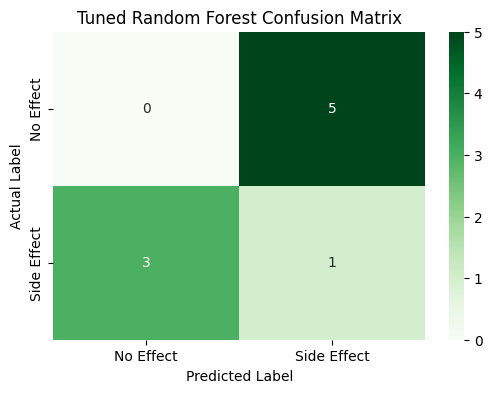



=============== MODEL 2: XGBoost Classifier with TF-IDF ===============
--> Training the XGBoost model...

--- XGBoost Classifier Evaluation ---
🎯 Accuracy: 55.56%

Classification Report:
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       0.00      0.00      0.00         4

    accuracy                           0.56         9
   macro avg       0.28      0.50      0.36         9
weighted avg       0.31      0.56      0.40         9



/Users/ayush/.pyenv/versions/3.10.13/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [12:18:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


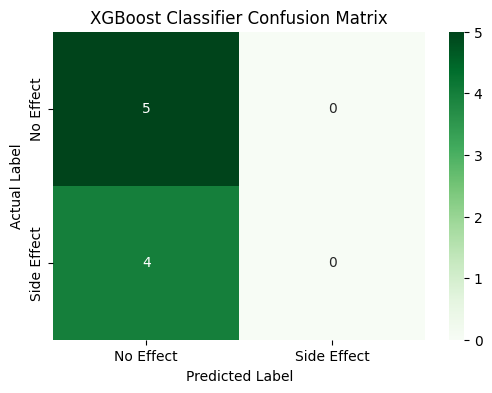

In [1]:
# --- UNIVERSAL INSTALL & ADVANCED MODELING SCRIPT ---
#
# INSTRUCTIONS:
# 1. Run this cell. If xgboost is missing, it will be installed, and the kernel will stop.
# 2. After the kernel restarts, RE-RUN THIS SAME CELL to train the improved models.
#
import sys
import os
import subprocess

# Add xgboost for a more powerful model
REQUIRED_PACKAGES = ['pandas', 'scikit-learn', 'xgboost']

def install_and_restart(packages):
    """Installs required packages and forces a kernel restart."""
    print("One or more required packages are missing.")
    python_executable = sys.executable
    for package in packages:
        try:
            # Handle special package names
            if package == 'scikit-learn':
                __import__('sklearn')
            else:
                __import__(package)
        except ImportError:
            print(f"--> Installing {package}...")
            subprocess.check_call([python_executable, "-m", "pip", "install", package],
                                  stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)

    print("\n*** KERNEL RESTART REQUIRED ***")
    print("Installation complete. Please RE-RUN THIS CELL after the kernel restarts.")
    os._exit(0) # Stops the kernel

try:
    # Try importing all required libraries
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.model_selection import train_test_split, GridSearchCV
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.pipeline import Pipeline
    from sklearn.ensemble import RandomForestClassifier
    from xgboost import XGBClassifier
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

    print("✅ All libraries are installed. Running the advanced model training script...\n")

    # --- MAIN SCRIPT STARTS HERE ---

    # 1. LOAD DATA
    # ==================================
    try:
        df = pd.read_csv('cleaned_and_featured_data.csv')
        # Drop rows with missing medical_term values if any
        df.dropna(subset=['medical_term'], inplace=True)
        print(f"--> Loaded 'cleaned_and_featured_data.csv'. Shape: {df.shape}")
    except FileNotFoundError:
        print("❌ ERROR: 'cleaned_and_featured_data.csv' not found.")
        exit()

    # 2. PREPARE DATA
    # ==================================
    print("\n--- Preparing Data for Advanced Modeling ---")
    # Using 'medical_term' as the primary feature
    X = df['medical_term']
    y = df['is_side_effect']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    print(f"--> Data split into training ({len(X_train)} rows) and testing ({len(X_test)} rows) sets.")


    def evaluate_model(model_name, y_true, y_pred):
        """A helper function to print evaluation metrics."""
        print(f"\n--- {model_name} Evaluation ---")
        accuracy = accuracy_score(y_true, y_pred)
        print(f"🎯 Accuracy: {accuracy:.2%}")
        print("\nClassification Report:")
        print(classification_report(y_true, y_pred, zero_division=0))

        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                    xticklabels=['No Effect', 'Side Effect'], yticklabels=['No Effect', 'Side Effect'])
        plt.title(f'{model_name} Confusion Matrix')
        plt.ylabel('Actual Label')
        plt.xlabel('Predicted Label')
        plt.show()


    # 3. IMPROVED RANDOM FOREST WITH HYPERPARAMETER TUNING
    # =======================================================
    print("\n\n{'='*15} MODEL 1: Tuned Random Forest with TF-IDF {'='*15}")

    # Create a pipeline with TF-IDF and the classifier
    rf_pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(lowercase=True, stop_words='english')),
        ('clf', RandomForestClassifier(random_state=42))
    ])

    # Define a grid of parameters to search
    rf_param_grid = {
        'tfidf__ngram_range': [(1, 1), (1, 2)], # Check single words and two-word pairs
        'clf__n_estimators': [100, 200],      # Number of trees in the forest
        'clf__max_depth': [10, 20, None]       # Maximum depth of the trees
    }

    # Use GridSearchCV to find the best parameters
    print("--> Searching for the best Random Forest parameters (this may take a minute)...")
    rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=3, n_jobs=-1, verbose=1)
    rf_grid_search.fit(X_train, y_train)

    print(f"\nBest parameters found: {rf_grid_search.best_params_}")

    # Evaluate the best model found by the grid search
    y_pred_rf = rf_grid_search.predict(X_test)
    evaluate_model("Tuned Random Forest", y_test, y_pred_rf)


    # 4. XGBOOST CLASSIFIER (A POWERFUL ALTERNATIVE)
    # =================================================
    print(f"\n\n{'='*15} MODEL 2: XGBoost Classifier with TF-IDF {'='*15}")
    xgb_pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(lowercase=True, stop_words='english')),
        ('clf', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
    ])

    print("--> Training the XGBoost model...")
    xgb_pipeline.fit(X_train, y_train)
    y_pred_xgb = xgb_pipeline.predict(X_test)

    evaluate_model("XGBoost Classifier", y_test, y_pred_xgb)


except (ImportError, ModuleNotFoundError):
    # If any import fails, run the installation function
    install_and_restart(REQUIRED_PACKAGES)

In [1]:
# --- UNIVERSAL INSTALL & CONTEXT ENHANCEMENT SCRIPT ---
#
# INSTRUCTIONS:
# 1. Run this cell. It will install required packages and then the kernel will stop. THIS IS EXPECTED.
# 2. After the kernel restarts, RE-RUN THIS SAME CELL to generate the new file.
#
import sys
import os
import subprocess

# Add textblob for sentiment analysis
REQUIRED_PACKAGES = ['pandas', 'textblob']

def install_and_restart(packages):
    """Installs required packages and forces a kernel restart."""
    print("One or more required packages are missing.")
    python_executable = sys.executable
    for package in packages:
        try:
            __import__(package)
        except ImportError:
            print(f"--> Installing {package}...")
            subprocess.check_call([python_executable, "-m", "pip", "install", package],
                                  stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
    
    # TextBlob needs to download its corpora
    print("--> Downloading NLTK corpora for TextBlob...")
    subprocess.check_call([python_executable, "-m", "textblob.download_corpora"],
                          stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)

    print("\n*** KERNEL RESTART REQUIRED ***")
    print("Installation complete. Please RE-RUN THIS CELL after the kernel restarts.")
    os._exit(0)

try:
    # Try importing all required libraries
    import pandas as pd
    from textblob import TextBlob
    import re

    print("✅ All libraries are installed. Running the data enhancement script...\n")

    # --- MAIN SCRIPT STARTS HERE ---

    # 1. LOAD THE ORIGINAL DATA AND KEYWORDS
    # ==================================
    try:
        df_text = pd.read_csv('train.csv')
        df_keywords = pd.read_csv('medical_keywords_summary.csv')
        print("--> Loaded 'train.csv' and 'medical_keywords_summary.csv'.")
    except FileNotFoundError as e:
        print(f"❌ ERROR: Make sure '{e.filename}' is in the same directory.")
        exit()

    # Create a fast lookup set for your medical terms
    medical_vocabulary = set(df_keywords['medical_term'].str.lower().unique())

    # 2. EXTRACT CONTEXT AND SENTIMENT
    # ==================================
    print("\n--- Extracting context and sentiment for each medical term... ---")
    
    enhanced_data = []

    # Iterate through each description in the original train.csv
    for index, row in df_text.iterrows():
        text = row['text']
        label = row['labels']

        # Split the text into sentences
        sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)

        for sentence in sentences:
            # Find which medical terms from your list appear in this sentence
            found_terms = {word for word in re.findall(r'\b\w+\b', sentence.lower()) if word in medical_vocabulary}
            
            if found_terms:
                # Calculate the sentiment of the sentence
                sentiment = TextBlob(sentence).sentiment
                
                for term in found_terms:
                    enhanced_data.append({
                        'medical_term': term,
                        'label': label,
                        'context_sentence': sentence.strip(),
                        'sentiment_polarity': sentiment.polarity, # -1 (negative) to +1 (positive)
                        'sentiment_subjectivity': sentiment.subjectivity # 0 (objective) to 1 (subjective)
                    })

    # 3. CREATE AND SAVE THE NEW DATAFRAME
    # ========================================
    if enhanced_data:
        final_df = pd.DataFrame(enhanced_data)
        final_df.drop_duplicates(inplace=True)
        
        output_filename = 'context_enhanced_data.csv'
        final_df.to_csv(output_filename, index=False)
        
        print(f"\n✅ Data enhancement complete! New file saved as '{output_filename}'")
        print("New data shape:", final_df.shape)
        print("\nPreview of the new, context-rich data:")
        print(final_df.head())
    else:
        print("\n--> No medical terms from your list were found in 'train.csv'.")


except (ImportError, ModuleNotFoundError):
    # If any import fails, run the installation function
    install_and_restart(REQUIRED_PACKAGES)

✅ All libraries are installed. Running the data enhancement script...

--> Loaded 'train.csv' and 'medical_keywords_summary.csv'.

--- Extracting context and sentiment for each medical term... ---

✅ Data enhancement complete! New file saved as 'context_enhanced_data.csv'
New data shape: (6147, 5)

Preview of the new, context-rich data:
  medical_term  label                                   context_sentence  \
0     shingles      1  Shingles Vaccine: Warning, this post contains ...   
1     shingles      1  Going to get my 2nd shingles shot in 15 minute...   
2         sore      1  My arm is extremely sore, I have a low-grade f...   
3        fever      1  My arm is extremely sore, I have a low-grade f...   
4     headache      1  So, if you have a vaccine, or 2, and your body...   

   sentiment_polarity  sentiment_subjectivity  
0            0.000000                0.000000  
1           -0.178571                0.214286  
2           -0.125000                1.000000  
3           

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

print("--- Training models on the new context-enhanced data ---")

# 1. LOAD THE NEW DATASET
# ==================================
try:
    df = pd.read_csv('context_enhanced_data.csv')
    df.dropna(inplace=True) # Ensure no missing values
    print(f"--> Loaded 'context_enhanced_data.csv'. Shape: {df.shape}")
except FileNotFoundError:
    print("❌ ERROR: 'context_enhanced_data.csv' not found. Please run Step 1 first.")
    exit()

# 2. PREPARE DATA FOR MODELING
# ==================================
# We now have much better features to use!
X = df[['context_sentence', 'sentiment_polarity']]
y = df['label']

# Define which features are text and which are numerical
text_features = 'context_sentence'
numerical_features = ['sentiment_polarity']

# Create a more advanced pre-processor
# It will apply TF-IDF to the sentence and scale the sentiment score
preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1, 2)), text_features),
        ('num', StandardScaler(), numerical_features)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# 3. TRAIN AND EVALUATE THE MODEL
# =================================================
# We'll use Random Forest, as it works well with this type of data
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=150, random_state=42, max_depth=20))
])

print("\n--> Training the Random Forest model on the new data...")
rf_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = rf_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Final Model Accuracy: {accuracy:.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

--- Training models on the new context-enhanced data ---
--> Loaded 'context_enhanced_data.csv'. Shape: (6147, 5)

--> Training the Random Forest model on the new data...

🎯 Final Model Accuracy: 79.76%

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       593
           1       0.84      0.76      0.80       637

    accuracy                           0.80      1230
   macro avg       0.80      0.80      0.80      1230
weighted avg       0.80      0.80      0.80      1230



In [3]:
# --- UNIVERSAL INSTALL & FULL DATA ENHANCEMENT SCRIPT ---
#
# INSTRUCTIONS:
# 1. Run this cell. It may install required packages and stop the kernel. THIS IS EXPECTED.
# 2. After the kernel restarts, RE-RUN THIS SAME CELL to generate the final data file.
#
import sys
import os
import subprocess

# Add textblob for sentiment analysis
REQUIRED_PACKAGES = ['pandas', 'textblob']

def install_and_restart(packages):
    """Installs required packages and forces a kernel restart."""
    print("One or more required packages are missing.")
    python_executable = sys.executable
    for package in packages:
        try:
            __import__(package)
        except ImportError:
            print(f"--> Installing {package}...")
            subprocess.check_call([python_executable, "-m", "pip", "install", package],
                                  stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
    
    # TextBlob needs to download its corpora
    print("--> Downloading NLTK corpora for TextBlob...")
    subprocess.check_call([python_executable, "-m", "textblob.download_corpora"],
                          stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)

    print("\n*** KERNEL RESTART REQUIRED ***")
    print("Installation complete. Please RE-RUN THIS CELL after the kernel restarts.")
    os._exit(0)

try:
    # Try importing all required libraries
    import pandas as pd
    from textblob import TextBlob
    import re
    from collections import Counter

    print("✅ All libraries are installed. Running the full data enhancement script...\n")

    # --- MAIN SCRIPT STARTS HERE ---

    # 1. LOAD THE ORIGINAL DATA AND KEYWORDS
    # ==================================
    try:
        df_text = pd.read_csv('train.csv')
        df_keywords = pd.read_csv('medical_keywords_summary.csv')
        print("--> Loaded 'train.csv' and 'medical_keywords_summary.csv'.")
    except FileNotFoundError as e:
        print(f"❌ ERROR: Make sure '{e.filename}' is in the same directory.")
        exit()

    medical_vocabulary = set(df_keywords['medical_term'].str.lower().unique())

    # 2. CALCULATE GLOBAL TERM FREQUENCY (NEW STEP)
    # ==================================================
    print("\n--- Calculating global frequency of each medical term... ---")
    
    # Combine all text into one large string
    all_text = ' '.join(df_text['text'].dropna().astype(str))
    all_words = re.findall(r'\b\w+\b', all_text.lower())
    
    # Count only the words that are in our medical vocabulary
    global_term_counts = Counter(word for word in all_words if word in medical_vocabulary)
    
    print("--> Global counts calculated.")

    # 3. EXTRACT CONTEXT, SENTIMENT, AND GLOBAL FREQUENCY
    # ======================================================
    print("\n--- Extracting context, sentiment, and mapping global counts... ---")
    
    enhanced_data = []
    for index, row in df_text.iterrows():
        text = row['text']
        label = row['labels']
        sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)

        for sentence in sentences:
            found_terms = {word for word in re.findall(r'\b\w+\b', sentence.lower()) if word in medical_vocabulary}
            
            if found_terms:
                sentiment = TextBlob(sentence).sentiment
                
                for term in found_terms:
                    enhanced_data.append({
                        'medical_term': term,
                        'label': label,
                        'context_sentence': sentence.strip(),
                        'sentiment_polarity': sentiment.polarity,
                        'sentiment_subjectivity': sentiment.subjectivity,
                        'global_term_frequency': global_term_counts.get(term, 0) # Get the global count
                    })

    # 4. CREATE AND SAVE THE FINAL DATAFRAME
    # ========================================
    if enhanced_data:
        final_df = pd.DataFrame(enhanced_data).drop_duplicates()
        
        output_filename = 'context_enhanced_data_final.csv'
        final_df.to_csv(output_filename, index=False)
        
        print(f"\n✅ Data enhancement complete! New file saved as '{output_filename}'")
        print("New data shape:", final_df.shape)
        print("\nPreview of the final data with the new 'global_term_frequency' column:")
        print(final_df.head())
    else:
        print("\n--> No medical terms from your list were found in 'train.csv'.")


except (ImportError, ModuleNotFoundError):
    # If any import fails, run the installation function
    install_and_restart(REQUIRED_PACKAGES)

✅ All libraries are installed. Running the full data enhancement script...

--> Loaded 'train.csv' and 'medical_keywords_summary.csv'.

--- Calculating global frequency of each medical term... ---
--> Global counts calculated.

--- Extracting context, sentiment, and mapping global counts... ---

✅ Data enhancement complete! New file saved as 'context_enhanced_data_final.csv'
New data shape: (6147, 6)

Preview of the final data with the new 'global_term_frequency' column:
  medical_term  label                                   context_sentence  \
0     shingles      1  Shingles Vaccine: Warning, this post contains ...   
1     shingles      1  Going to get my 2nd shingles shot in 15 minute...   
2         sore      1  My arm is extremely sore, I have a low-grade f...   
3        fever      1  My arm is extremely sore, I have a low-grade f...   
4     headache      1  So, if you have a vaccine, or 2, and your body...   

   sentiment_polarity  sentiment_subjectivity  global_term_frequenc

✅ All libraries are installed. Running the model training script...

--> Loaded 'context_enhanced_data_final.csv'. Shape: (6147, 6)

--- Preparing data with all features for modeling ---

--> Training the Random Forest model on the enhanced data...

--- Final Model Evaluation ---
🎯 Accuracy: 84.47%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       593
           1       0.87      0.83      0.85       637

    accuracy                           0.84      1230
   macro avg       0.84      0.85      0.84      1230
weighted avg       0.85      0.84      0.84      1230


Confusion Matrix:


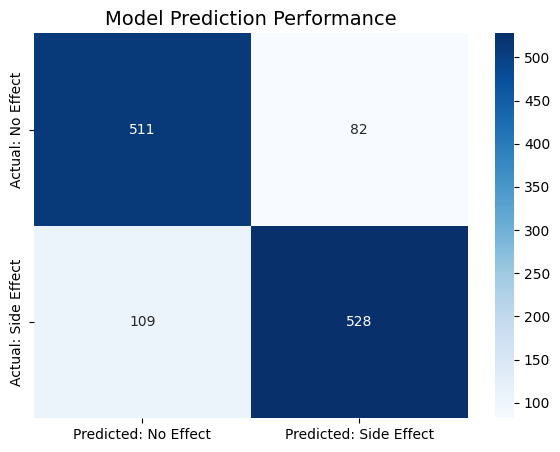

In [4]:
# --- FINAL Machine Learning Script ---
# This script trains a model on the fully enhanced data.

import sys
import os
import subprocess

def install_and_restart(package):
    """Installs a package and forces a kernel restart."""
    print(f"Required package '{package}' not found. Installing now...")
    python_executable = sys.executable
    subprocess.check_call([python_executable, "-m", "pip", "install", package],
                          stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
    
    print("\n*** KERNEL RESTART REQUIRED ***")
    print("Installation complete. Please RE-RUN THIS CELL after the kernel restarts.")
    os._exit(0)

try:
    # Try importing all required libraries
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.model_selection import train_test_split
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.preprocessing import StandardScaler
    from sklearn.compose import ColumnTransformer
    from sklearn.pipeline import Pipeline
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

    print("✅ All libraries are installed. Running the model training script...\n")

except (ImportError, ModuleNotFoundError):
    # If scikit-learn is missing, install it and restart
    install_and_restart('scikit-learn')


# 1. LOAD THE ENHANCED DATA
# ==================================
try:
    df = pd.read_csv('context_enhanced_data_final.csv')
    df.dropna(inplace=True) # Ensure no missing values
    print(f"--> Loaded 'context_enhanced_data_final.csv'. Shape: {df.shape}")
except FileNotFoundError:
    print("❌ ERROR: 'context_enhanced_data_final.csv' not found. Please run the data creation script first.")
    exit()

# 2. PREPARE DATA FOR MODELING
# ==================================
print("\n--- Preparing data with all features for modeling ---")

# Define our features (X) and target (y)
X = df[['context_sentence', 'sentiment_polarity', 'sentiment_subjectivity', 'global_term_frequency']]
y = df['label']

# Define which column holds text and which hold numerical data
text_features = 'context_sentence'
numerical_features = ['sentiment_polarity', 'sentiment_subjectivity', 'global_term_frequency']

# Create a pre-processing pipeline to handle different data types
# - TfidfVectorizer: Converts text into numerical vectors, considering word importance.
# - StandardScaler: Scales numerical data to have a consistent range.
preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=1000), text_features),
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough' # Keep other columns if any, though we're using all of them
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


# 3. TRAIN AND EVALUATE THE RANDOM FOREST MODEL
# =================================================
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=150, random_state=42))
])

print("\n--> Training the Random Forest model on the enhanced data...")
rf_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_pipeline.predict(X_test)


# 4. SHOW PERFORMANCE METRICS
# =================================================
print("\n--- Final Model Evaluation ---")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Accuracy: {accuracy:.2%}")

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: No Effect', 'Predicted: Side Effect'],
            yticklabels=['Actual: No Effect', 'Actual: Side Effect'])
plt.title('Model Prediction Performance', fontsize=14)
plt.show()

✅ Libraries loaded successfully. Running the robust multi-model script...

--> Loaded 'context_enhanced_data_final.csv'. Shape: (6147, 6)

--- Manually preparing data to avoid pipeline errors ---
--> Vectorizing text data with TF-IDF...
--> Scaling numerical data...
--> Combining processed features...


==================== MODEL: LOGISTIC REGRESSION ====================
--> Training the Logistic Regression model...
🎯 Accuracy: 81.30%

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       593
           1       0.83      0.80      0.82       637

    accuracy                           0.81      1230
   macro avg       0.81      0.81      0.81      1230
weighted avg       0.81      0.81      0.81      1230



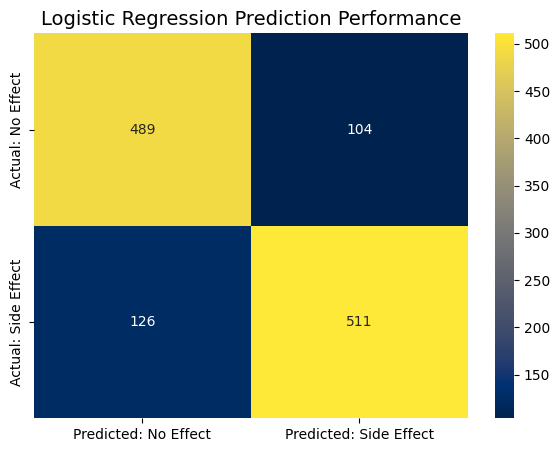



==================== MODEL: SUPPORT VECTOR MACHINE (SVM) ====================
--> Training the Support Vector Machine (SVM) model...
🎯 Accuracy: 82.20%

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       593
           1       0.87      0.77      0.82       637

    accuracy                           0.82      1230
   macro avg       0.83      0.82      0.82      1230
weighted avg       0.83      0.82      0.82      1230



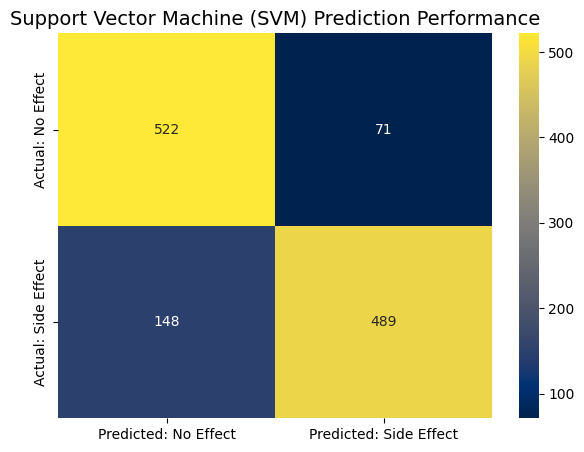



==================== MODEL: XGBOOST CLASSIFIER ====================
--> Training the XGBoost Classifier model...


/Users/ayush/.pyenv/versions/3.10.13/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [12:29:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🎯 Accuracy: 82.11%

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       593
           1       0.85      0.80      0.82       637

    accuracy                           0.82      1230
   macro avg       0.82      0.82      0.82      1230
weighted avg       0.82      0.82      0.82      1230



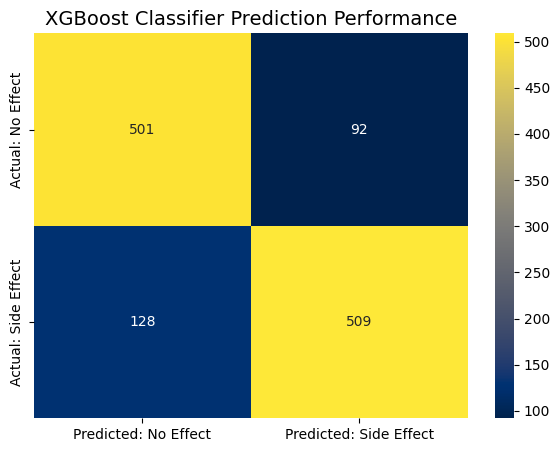

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("✅ Libraries loaded successfully. Running the robust multi-model script...\n")

# 1. LOAD THE ENHANCED DATA
# ==================================
try:
    df = pd.read_csv('context_enhanced_data_final.csv')
    df.dropna(inplace=True) # Ensure no missing values
    print(f"--> Loaded 'context_enhanced_data_final.csv'. Shape: {df.shape}")
except FileNotFoundError:
    print("❌ ERROR: 'context_enhanced_data_final.csv' not found. Please run the data creation script first.")
    exit()

# 2. PREPARE DATA FOR MODELING
# ==================================
print("\n--- Manually preparing data to avoid pipeline errors ---")
X = df[['context_sentence', 'sentiment_polarity', 'sentiment_subjectivity', 'global_term_frequency']]
y = df['label']

# Split data into training and testing sets first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# --- Manual Preprocessing ---
# a) Process Text Data
print("--> Vectorizing text data with TF-IDF...")
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=1000)
X_train_text = tfidf.fit_transform(X_train['context_sentence'])
X_test_text = tfidf.transform(X_test['context_sentence'])

# b) Process Numerical Data
print("--> Scaling numerical data...")
numerical_cols = ['sentiment_polarity', 'sentiment_subjectivity', 'global_term_frequency']
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numerical_cols])
X_test_num = scaler.transform(X_test[numerical_cols])

# c) Combine Processed Text and Numerical Data
print("--> Combining processed features...")
X_train_processed = hstack([X_train_text, X_train_num])
X_test_processed = hstack([X_test_text, X_test_num])


def evaluate_model(model_name, model, X_train, y_train, X_test, y_test):
    """Helper function to train a model on processed data and print its evaluation."""
    print(f"\n\n{'='*20} MODEL: {model_name.upper()} {'='*20}")
    print(f"--> Training the {model_name} model...")
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"🎯 Accuracy: {accuracy:.2%}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='cividis',
                xticklabels=['Predicted: No Effect', 'Predicted: Side Effect'],
                yticklabels=['Actual: No Effect', 'Actual: Side Effect'])
    plt.title(f'{model_name} Prediction Performance', fontsize=14)
    plt.show()

# 3. DEFINE AND EVALUATE MODELS
# =================================================
# Model 1: Logistic Regression
lr_model = LogisticRegression(random_state=42, solver='liblinear')
evaluate_model("Logistic Regression", lr_model, X_train_processed, y_train, X_test_processed, y_test)

# Model 2: Support Vector Machine (SVM)
svm_model = SVC(kernel='rbf', gamma='scale', random_state=42)
evaluate_model("Support Vector Machine (SVM)", svm_model, X_train_processed, y_train, X_test_processed, y_test)

# Model 3: XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
evaluate_model("XGBoost Classifier", xgb_model, X_train_processed, y_train, X_test_processed, y_test)